# Titanic disaster model

### Inrotuction
 The sinking of the Titanic is a well-known disaster in history. On April 15, 1912, during its first journey, the supposedly unsinkable RMS Titanic hit an iceberg and sank. Sadly, there weren't sufficient lifeboats for everyone on board, leading to the loss of 1502 lives out of 2224 passengers and crew. The RMS Titanic was the largest ship afloat at the time it entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster. Survival was partly a matter of luck, but certain groups had better chances of making it through than others. In our project, we want to build a predictive model that answers the question: *"what sorts of people were more likely to survive?"* using passenger data [1].

Machine learning is increasingly being used to predict survival outcomes, including in scenarios like the Titanic disaster.
Common methods used for predicting survival:

- **Logistic Regression [2]**:
Classic statistical method employed for binary classification problems, such as predicting survival or non-survival.
It models the probability of an event occurring (e.g., survival) based on one or more predictor variables. A perceptron is a single layer neural network

- **Random Forests [3]**:
Commonly-used machine learning algorithm trademarked by Leo Breiman and Adele Cutler, which combines the output of multiple decision trees to reach a single resultThis method is effective in capturing complex relationships in the data and is resistant to overfitting.

- **Support Vector Machines (SVM) [4]**:
Supervised learning algorithm that can be used for classification tasks.
It works well for both linear and non-linear relationships in the data and can be applied to predict survival based on various features. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

- **Deep learning models [5]**:
subset of machine learning, which is essentially a neural network with three or more layers. These neural networks attempt to simulate the behavior of the human brain—albeit far from matching its ability—allowing it to “learn” from large amounts of data. While a neural network with a single layer can still make approximate predictions, additional hidden layers can help to optimize and refine for accuracy. They can be used to create complex models for predicting survival, provided there is enough data available.

- **Feature Engineering [6]**:
Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. It can produce new features for both supervised and unsupervised learning, with the goal of simplifying and speeding up data transformations while also enhancing model accuracy. Feature engineering is required when working with machine learning models.

In our prediction, we will use and compare with each other single perceptron model, as an example of linear regression, SVM and Random Tree model. Our expectation is to predict if the passenger would survive or not with at least 60% accuracy. We will also compare our models with the ones, provided by the sklearn learn library

https://www.kaggle.com/competitions/titanic
https://www.kaggle.com/code/alexisbcook/titanic-tutorial/notebook
[1] https://towardsdatascience.com/predicting-the-survival-of-titanic-passengers-30870ccc7e8
[2] https://towardsdatascience.com/the-perceptron-3af34c84838c
[3] https://www.ibm.com/topics/random-forest
[4] https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
[5] https://www.ibm.com/topics/deep-learning
[6] https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10

### Seting up environment

In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.optimize import minimize, LinearConstraint
from sklearn.linear_model import LogisticRegression

### About the dataset
The dataset used in the project was downloaded from github repository provided by Kaggle: https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/. 
The training-set has 891 examples and 11 features + the target variable (survived). It were as fallows:

It came with data dictionary with definitions of values and keys of the dataset. From left variables were as fallows: 
PassengerId - unigue id of a passenger,

PassengerId - unigue id of a passenger,
Survival - Survival result (0 = No, 1 = Yes),
Pclass	- ticket class	(1 = 1st, 2 = 2nd, 3 = 3rd),
Name - passenger name,
Sex     - sex,
Age	    -     age in years,
Sibsp	-    number of siblings / spouses aboard the Titanic, 	
Parch	-     number of parents / children aboard the Titanic	
Ticket	-    ticket number, 
Fare	-    passenger fare	
Cabin	-    cabin number	
Embarked -	port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton.




In [25]:
gh_path = 'https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/'
df_train = pd.read_csv(gh_path + 'train.csv')
df_test = pd.read_csv(gh_path + 'test.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Feature engineering
Main task in this section was to prepare dataset for modeling. It was necessary to remove certain features that were redundant, that is "Name", "Ticket", "Cabin" and "Embarked". It was concluded, that name of the passenger, port of embarkation, ticket and cabin number were meaningless for analysis. Nevertheless, we concluded, that cabin placement on ship might have had influence on priority over reaching the lifeboats. Information about cabin placement could be hidden in ticket's fare,. This feature was left in dataset to include passenger placement in model.

Another change that had to be made was the change of sex's values from string to binary. In the project attributes for male and female were assigned to 0 and 1 respectively.

Last thing that was done, was the drop of keys with missing values. 

In [26]:
# Drop unnecessary columns
columns_to_drop = ['Name','Ticket', 'Cabin', 'Embarked']
df_train_processed = df_train.drop(columns=columns_to_drop)
df_test_processed = df_test.drop(columns=columns_to_drop)

# Drop keys with any NaN values
df_train_processed = df_train_processed.dropna()

# Change nan values for statisticaly correct values
average_age = df_test_processed['Age'].mean()
df_test_processed['Age'].fillna(average_age, inplace=True)

average_fare_train = df_test_processed['Fare'].mean()
df_test_processed['Fare'].fillna(average_fare_train, inplace=True)

# Sex changed to binary
df_train_processed['Sex'] = df_train_processed['Sex'].replace({'male': 0, 'female': 1})
df_test_processed['Sex'] = df_test_processed['Sex'].replace({'male': 0, 'female': 1})

print(df_train_processed)

     PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0              1         0       3    0  22.0      1      0   7.2500
1              2         1       1    1  38.0      1      0  71.2833
2              3         1       3    1  26.0      0      0   7.9250
3              4         1       1    1  35.0      1      0  53.1000
4              5         0       3    0  35.0      0      0   8.0500
..           ...       ...     ...  ...   ...    ...    ...      ...
885          886         0       3    1  39.0      0      5  29.1250
886          887         0       2    0  27.0      0      0  13.0000
887          888         1       1    1  19.0      0      0  30.0000
889          890         1       1    0  26.0      0      0  30.0000
890          891         0       3    0  32.0      0      0   7.7500

[714 rows x 8 columns]


Processed train dataset was next splited into training and testing sets using train_test_split functntion:

In [42]:
Y = df_train_processed['Survived'].values
X = df_train_processed[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=420)

### Perceptron
The perceptron, a fundamental concept in artificial intelligence and machine learning, is a simple type of artificial neuron inspired by the way biological neurons work in the human brain. Developed by Frank Rosenblatt in 1957, perceptrons serve as the building blocks for more complex neural network architectures. A perceptron takes multiple input features, applies weights to these inputs, and produces an output based on a defined activation function. The weights are adjusted during training to enable the perceptron to learn patterns and make predictions.

In this code, a PerceptronLogistic class is implemented to showcase a basic perceptron for logistic regression. Logistic regression is a binary classification algorithm, and the perceptron is trained using gradient descent to find optimal weights and biases. The code includes data preprocessing steps, the implementation of the perceptron class, and training and evaluation of the model on the Titanic dataset. Additionally, scikit-learn's Logistic Regression is used as a benchmark for comparison.

Parameters:
    - W (np.array): Initial weights for the perceptron.
    - b (float): Initial bias for the perceptron.
    - epo (int): Number of training epochs.
    - lr (float): Learning rate for gradient descent.

Methods:
- fit(X, y, randomstate=None, batch=1, verbose=False):
    Train the perceptron on the provided training data (X, y).

    Parameters:
    - X (np.array): Training input data.
    - y (np.array): Target labels for training data.
    - randomstate (int or None): Seed for random weight initialization.
    - batch (int): Size of mini-batches for gradient descent.
    - verbose (bool): If True, display training progress.

    Returns:
    - history (np.array): Array containing the training loss at each epoch.

- predict(X):
    Make predictions using the trained perceptron.

    Parameters:
    - X (np.array): Input data for making predictions.

    Returns:
    - predictions (np.array): Predicted probabilities.

- plot_history(history, ax=None):
    Plot the training loss history.

    Parameters:
    - history (np.array): Array containing the training loss at each epoch.
    - ax (matplotlib.axes._subplots.AxesSubplot or None): Matplotlib axis for plotting.

Notes:
- The perceptron uses a sigmoid activation function for logistic regression.
- Training is performed using gradient descent with an option for batch processing.
- Implements basic methods for perceptron initialization, prediction, and visualization.

PerceptronLogistic Class Implementation:

In [28]:
class PerceptronLogistic:
    def __init__(self, W : np.array,  b = 0, epo = 100, lr = 0.01):
        # Initialization of perceptron parameters
        self.W = W
        self.N = len(W)
        self.b = b
        self.epo = epo
        self.lr = lr

    ############################## GETTERS ##############################

    def get_N(self):
        return self.N
    
    def get_b(self):
        return self.b
    
    def get_W(self):
        return self.W
    
    ############################## SETTERS ##############################
    
    # Create setters for the perceptron
    def set_N(self, N):
        self.N = N
        self.W = np.zeros(N)
        
    def set_b(self, b):
        self.b = b
        
    def set_W(self, W : np.array):
        if W.ndim != 1:
            print("Cannot set such weights -> dimension wrong")
            return
        self.N = W.shape[0]
        self.W = W
    
    def set_lr(self, lr):
        self.lr = lr
        
    def set_epo(self, epo):
        self.epo = epo

    ############################## GETTERS OVERRIDE ##############################
    
    def __getitem__(self, key):
        return self.W[key]
    
    def __setitem__(self, key, value):
        self.W[key] = value
        
    def __getslice(self, i, j):
        return self.W[i:j]
    
    def get_lr(self):
        return self.lr

    def get_epo(self):
        return self.epo
    
    # set the string output of the perceptron

    def __str__(self):
        return f"Am a perceptron of N={self.N} dimension{'s' if self.N > 1 else ''} biased with b={self.b}"    

    ############################## OPERATORS OVERRIDE ##############################
     
    def __mul__(self, other):
        return self.activation_function(other)
    
    def __rmul__(self, other):
        return self.__mul__(other)

    ############################## PERCEPTRON METHODS ##############################
    
    '''
    Net output is the basic body action of the perceptron. On top of it, the activation function is used.
    '''
    def net_output(self, X):
        # Computes the net output of the perceptron
        return np.dot(X, self.W) + self.b

    def activation_function(self, X):
        # Applies the sigmoid activation function
        net_output = self.net_output(X)
        return (1.0 / (1.0 + np.exp(-np.clip(net_output, -500, 500)))).reshape(-1, 1)

    def loss(self, y_true: np.array, y_pred: np.array):
        # Computes the logistic loss
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        return -np.sum(np.multiply(y_true, np.log(y_pred)) + np.multiply((1.0 - y_true), np.log(1.0 - y_pred)))

    def gradient(self, x_true, y_true, prediction):
        # Computes the gradient for weight and bias updates
        val = y_true - prediction
        suma_w = np.dot(val, x_true)
        suma_b = np.sum(val)
        return suma_b, suma_w

    def predict(self, X):
        # Makes predictions using the activation function
        predictions = self.activation_function(X)
        return predictions.flatten()

    def fit(self, X, y, randomstate = None, batch = 1, verbose = False):
        # Trains the perceptron using gradient descent
        
        if type(X) != np.ndarray:
            X = np.array(X)
        if type(y) != np.ndarray:
            y = np.array(y).reshape(-1,1)
            
        # give fit the parameter randomstate and whenever it is not None, the weights
        # are reset to be random normal - this ensures random starting point of gradient descent
        if randomstate is not None:
            self.W = np.random.normal(0.0, 0.1, self.N)
            self.b = np.random.normal(0.0, 1.0)
        
        # Save the history of the losses. Why?
        history = []
        # If we want to calculate the gradient in buckets (look for description of the batch)
        bucket_num = len(X) // batch
        # slice the data onto batches without shuffling (no stochasticity)
        slicing = lambda x, b: x[(b-1)*batch:b*batch]
        
        # iterate epochs
        for epo in range(self.epo):
            # iterate batches
            loss = 0.0
            for bin in range(1, bucket_num + 1):
                X_slice = slicing(X,bin)
                y_slice = slicing(y,bin)
                # predict the output for a given slice (what is the shape of the output?)
                pred = self.predict(X_slice)
                
                suma_b, suma_w = self.gradient(X_slice, y_slice, pred.flatten())

                # calculate loss
                loss += self.loss(y_slice, pred.flatten())
                
                # update the weights
                self.W += np.mean(suma_w) * self.lr
                self.b += np.mean(suma_b) * self.lr
            # calculate average loss
            loss/=bucket_num

            history.append(loss.flatten())
        return np.array(history).flatten()
    
    def plot_history(self, history, ax = None):
        # Plots the training history
        if ax is None:
            fig, ax = plt.subplots()
        ax.set_xlabel('epo')
        ax.set_ylabel('loss')
        ax.plot(history)

#### PerceptronLogistic_vol_2 - A perceptron-based logistic regression model with enhancements.

The PerceptronLogistic_vol_2 class extends the foundational PerceptronLogistic class, introducing enhancements to boost training efficiency, convergence, and generalization. Notable improvements include the incorporation of learning rate decay, regularization, and early stopping.

Learning Rate Decay:
This enhancement involves gradually reducing the learning rate during training. A decaying learning rate helps fine-tune model adjustments, promoting smoother convergence.

Early Stopping:
To prevent overfitting and enhance generalization, early stopping is implemented. This feature halts training when the model's performance on a validation set ceases to improve, ensuring the model does not over-adapt to the training data.

Regularization:
By introducing regularization terms to the loss function, the model penalizes excessively large weights. This regularization mitigates overfitting, fostering improved generalization and robustness.

Parameters:
- W (np.array): Initial weights for the perceptron.
- b (float): Initial bias for the perceptron.
- epo (int): Number of training epochs.
- lr (float): Initial learning rate for gradient descent.
- decay_rate (float): Rate at which the learning rate decays over epochs.
- regularization_strength (float): Strength of L2 regularization to prevent overfitting.

Methods:
- fit(X, y, randomstate=None, batch=1, verbose=False, X_val=None, y_val=None):
    Train the perceptron on the provided training data (X, y).

    Parameters:
    - X (np.array): Training input data.
    - y (np.array): Target labels for training data.
    - randomstate (int or None): Seed for random weight initialization.
    - batch (int): Size of mini-batches for gradient descent.
    - verbose (bool): If True, display training progress.
    - X_val (np.array or None): Validation input data.
    - y_val (np.array or None): Target labels for validation data.

Returns:
- history (np.array): Array containing the training loss at each epoch.

Notes:
- Inherits from the PerceptronLogistic class and extends its functionality.
- Provides options for learning rate decay, L2 regularization, and early stopping.

In [29]:
class PerceptronLogistic_vol_2(PerceptronLogistic):

    def __init__(self, W: np.array, b=0, epo=100, lr=0.01, decay_rate=0.9, regularization_strength=0.01):
        super().__init__(W, b, epo, lr)
        self.decay_rate = decay_rate
        self.regularization_strength = regularization_strength

    def fit(self, X, y, randomstate=None, batch=1, verbose=False, X_val=None, y_val=None):
        if randomstate is not None:
            self.W = np.random.normal(0.0, 0.1, self.N)
            self.b = np.random.normal(0.0, 1.0)

        history = []
        bucket_num = len(X) // batch
        slicing = lambda x, b: x[(b-1)*batch:b*batch]

        for epo in range(self.epo):
            loss = 0.0
            for bin in range(1, bucket_num + 1):
                X_slice = slicing(X, bin)
                y_slice = slicing(y, bin)
                pred = self.predict(X_slice)

                suma_b, suma_w = self.gradient(X_slice, y_slice, pred.flatten())

                # Add regularization terms to the gradient
                suma_w += self.regularization_strength * self.W
                suma_b += self.regularization_strength * self.b

                loss += self.loss(y_slice, pred.flatten())

                self.W += np.mean(suma_w) * self.lr
                self.b += np.mean(suma_b) * self.lr

            # Learning rate decay
            self.lr *= self.decay_rate

            loss /= bucket_num
            history.append(loss.flatten())

            # Check for early stopping
            if X_val is not None and y_val is not None:
                val_pred = self.predict(X_val)
                val_loss = self.loss(y_val, val_pred.flatten())
                if len(history) > 1 and val_loss > history[-2]:
                    print(f"Early stopping at epoch {epo}")
                    break


        return np.array(history).flatten()

git Model Training and Evaluation

In [44]:
X = df_train_processed.drop('Survived', axis=1)
y = df_train_processed['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
perceptron_model = PerceptronLogistic(W=np.zeros(X_train.shape[1]), b=0.0, epo=500, lr=2e-3)
history = perceptron_model.fit(X_train_scaled, y_train, randomstate=42, batch=32, verbose=True)
y_pred = perceptron_model.predict(X_test_scaled)
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = np.mean(y_pred_binary.flatten() == y_test)
print(f"Perceptron accuracy: {accuracy}")

Perceptron accuracy: 0.45454545454545453


In [33]:
X_final_test_scaled = scaler.transform(df_test_processed)
predictions = perceptron_model.predict(X_final_test_scaled)
predictions_binary = (predictions >= 0.5).astype(int)
output = pd.DataFrame({'PassengerId': df_test_processed.PassengerId.values, 'Survived': predictions_binary})
output.to_csv('PerceptronLogistic_kaggle_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [34]:
improved_perceptron_model = PerceptronLogistic_vol_2(W=np.zeros(X_train.shape[1]), b=0.0, epo=500, lr=2e-3, decay_rate=0.9, regularization_strength=0.01)
history = improved_perceptron_model.fit(X_train_scaled, y_train, randomstate=42, batch=32, verbose=True)
y_pred = improved_perceptron_model.predict(X_test_scaled)
y_pred_binary = (y_pred >= 0.5).astype(int)
accuracy = np.mean(y_pred_binary.flatten() == y_test)
print(f"Perceptron accuracy: {accuracy}")

Perceptron accuracy: 0.6153846153846154


In [35]:
X_final_test_scaled = scaler.transform(df_test_processed)
predictions = perceptron_model.predict(X_final_test_scaled)
predictions_binary = (predictions >= 0.5).astype(int)
output = pd.DataFrame({'PassengerId': df_test_processed.PassengerId.values, 'Survived': predictions_binary})
output.to_csv('PerceptronLogistic_vol_2_kaggle_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Usage scikit-learn's Logistic Regression as a benchmark

In [40]:
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_accuracy = lr_model.score(X_test_scaled, y_test)
print(f"Scikit-learn Logistic Regression Accuracy: {lr_accuracy}")

Scikit-learn Logistic Regression Accuracy: 0.7552447552447552


### Suport Vector Machine

Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It is commonly used in classification problems where occur non-linear decision boundaries.  It aims to find the optimal hyperplane that separates different classes in the input space. In project, vectors are in 6-th dimention (described by 6 values: Pclass, Sex, Age, SibSp, Parch and Fare). Support vectors are data points from each class that are closest to the hyperplane. They play a crucial role in determining the optimal hyperplane and maximizing the margin between classes - the distance between the hyperplane and the nearest data point from each class.

There was unsuccesfull attempt to implement SVM class from scratch. A Decision was made to implement model using only scikit-learn package functions. Nevertheless, different kernel functions were used: linear, polynomial, radial basis function (RBF) and sigmoid function.

In [45]:
Y = df_train_processed['Survived'].values
X = df_train_processed[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=420)
### linear kernel
svm_model = SVC(kernel='linear')  #try different kernels
svm_model.fit(X_train, Y_train)

# making predictions on the test set
predictions = svm_model.predict(X_test)

# evaluating accuracies
accuracy = svm_model.score(X_test, Y_test)
print(f"Accuracy of linear kernel SVM: {accuracy}")

Accuracy of linear kernel SVM: 0.8333333333333334


In [11]:
### poly kernel
svm_model = SVC(kernel='poly')  #try different kernels
svm_model.fit(X_train, Y_train)
predictions = svm_model.predict(X_test)
accuracy = svm_model.score(X_test, Y_test)
print(f"Accuracy of poly kernel SVM: {accuracy}")

Accuracy of poly kernel SVM: 0.6388888888888888


In [13]:
### Radial Basis Function kernel
svm_model = SVC(kernel='rbf')  #try different kernels
svm_model.fit(X_train, Y_train)
predictions = svm_model.predict(X_test)
accuracy = svm_model.score(X_test, Y_test)
print(f"Accuracy of Radial Basis Function kernel SVM: {accuracy}")

Accuracy of Radial Basis Function kernel SVM: 0.6574074074074074


In [46]:
### sigmoid kernel
svm_model = SVC(kernel='sigmoid')  #try different kernels
svm_model.fit(X_train, Y_train)
predictions = svm_model.predict(X_test)
accuracy = svm_model.score(X_test, Y_test)
print(f"Accuracy of sigmoid kernel SVM: {accuracy}")

Accuracy of sigmoid kernel SVM: 0.6203703703703703


Best accuracy was reached for linear kernel SVM, and it was used for final prediction for Kaggle competition.

In [47]:
# save the results
predictions = svm_model.predict(df_test_processed[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']].values)
output = pd.DataFrame({'PassengerId': df_test_processed.PassengerId, 'Survived': predictions})
output.to_csv('SVM_kaggle_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


![Alt text](SVM-score.png)

##### Preprocesing for Random Forest

In [48]:
from sklearn.impute import KNNImputer
# Check properties and NaN
# print(df_train.describe())
# print('\nNull Values in Training \n{}'.format(df_train.isnull().sum()))
# print('\nNull Values in Testing \n{}'.format(df_test.isnull().sum()))

# Conclusion:
# 1. drop 'Cabin" - two many NaN
# 2. use some algorithm to replace NaN in 'Age', and one value in the Test dataset

# Drop unnecessary columns
columns_to_drop = ['PassengerId', 'Ticket', 'Name', 'Cabin']
tmp = df_train.drop(columns=columns_to_drop)
X_train = tmp.iloc[:, 1:]
Y_train = tmp['Survived']
X_test = df_test.drop(columns=columns_to_drop)

# Sex changed to binary
categories = {"female": 1, "male": 0}
for i in [X_train, X_test]:
    i['Sex'] = i['Sex'].map(categories)
# Embarked changed to numerical
X_train['Embarked'].fillna(value='S', inplace=True)  # as major of values is S
categories = {"S": 1, "C": 2, "Q": 3}
for i in [X_train, X_test]:
    i['Embarked'] = i['Embarked'].map(categories)

# Replace NaN
X_test['Fare'].fillna(value=X_test.Fare.mean(), inplace=True)
for i in [X_train, X_test]:
    tmp = KNNImputer().fit_transform(i)
    i['Age'] = tmp[:, 2]

Y_train.to_csv('Y.csv', index=False)

#### Random Forest Model

The Random Forest algorithm involves creating an ensemble of decision trees and combining their predictions for improved accuracy and robustness.

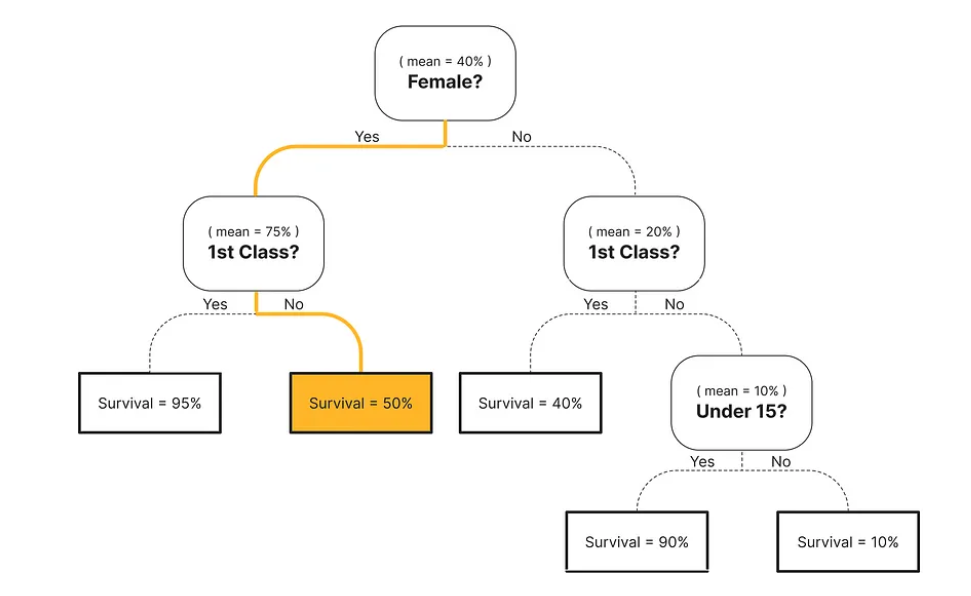

Major parts of this algorithm:

**Bootstrap Sampling:**

For each tree in the ensemble, create a bootstrap sample (random sample with replacement) from the training dataset. This results in a different subset of the data for each tree.

**Random Feature Selection:**

At each split in the decision tree, randomly select a subset of features to consider for the split. This introduces diversity among the trees and reduces overfitting.

**Decision Tree Training:**

Train a decision tree on the bootstrap sample using the randomly selected features at each split. The tree is grown until a predefined maximum depth is reached or a stopping criterion is met (e.g., pure leaves or minimum samples per leaf).

**Ensemble Prediction:**

For a new input, make predictions with each tree in the forest. In a classification task, use majority voting to determine the final predicted class. In a regression task, average the predictions from all trees.

-------------------------
Our implementation will use a simple decision tree with Gini impurity as the splitting criterion. The decision tree is built by recursively splitting the dataset based on the feature that provides the best split according to Gini impurity.
DecionTree class is used for that.

We will use the number of trees in the forest specified by 'n_estimators'.
The 'RandomForest' class creates an ensemble of decision trees and combines their predictions through majority voting.

Score = **0.74401**

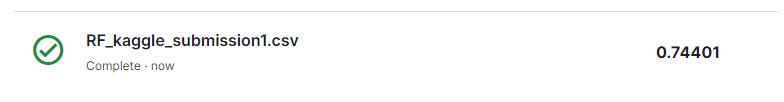

In [50]:
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._build_tree(X, y, depth=0)

    def _build_tree(self, X, y, depth):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)
        # If all samples belong to the same class or max depth is reached, create a leaf node
        if len(unique_classes) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'class': unique_classes[0], 'count': len(y)}
        # Find the best split (feature and threshold)
        best_feature, best_threshold = self._find_best_split(X, y)
        # If no split is found, create a leaf node
        if best_feature is None:
            return {'class': np.argmax(np.bincount(y)), 'count': len(y)}
        # Split the dataset based on the best feature and threshold
        left_indices = X[:, best_feature] <= best_threshold
        right_indices = ~left_indices
        # Recursively build left and right subtrees
        left_tree = self._build_tree(X[left_indices], y[left_indices], depth + 1)
        right_tree = self._build_tree(X[right_indices], y[right_indices], depth + 1)
        # Return the decision node
        return {'feature': best_feature, 'threshold': best_threshold, 'left': left_tree, 'right': right_tree}

    def _find_best_split(self, X, y):
        # Iterate over features and thresholds to find the best split (Gini impurity)
        best_gini = float('inf')
        best_feature = None
        best_threshold = None

        for feature in range(X.shape[1]):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_indices = X[:, feature] <= threshold
                right_indices = ~left_indices
                gini = self._calculate_gini(y[left_indices], y[right_indices])
                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold
        return best_feature, best_threshold

    def _calculate_gini(self, left_labels, right_labels):
        # Calculate Gini impurity for a split
        left_size = len(left_labels)
        right_size = len(right_labels)
        total_size = left_size + right_size
        if total_size == 0: return 0
        p_left = left_size / total_size
        p_right = right_size / total_size
        gini_left = 1 - np.sum((np.bincount(left_labels) / left_size) ** 2)
        gini_right = 1 - np.sum((np.bincount(right_labels) / right_size) ** 2)
        gini = p_left * gini_left + p_right * gini_right
        return gini

    def predict(self, X):
        return np.array([self._predict_tree(sample, self.tree) for sample in X])

    def _predict_tree(self, sample, node):
        if 'class' in node:
            return node['class']
        else:
            if sample[node['feature']] <= node['threshold']:
                return self._predict_tree(sample, node['left'])
            else:
                return self._predict_tree(sample, node['right'])


class RandomForest:
    def __init__(self, n_estimators, max_depth):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.forest = [DecisionTree(max_depth) for _ in range(n_estimators)]

    def fit(self, X, y):
        for tree in self.forest:
            # Create bootstrap sample
            indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y[indices]
            # Train each tree on a different bootstrap sample
            tree.fit(X_bootstrap, y_bootstrap)

    def predict(self, X):
        # Make predictions by combining predictions from all trees (majority voting)
        predictions = np.array([tree.predict(X) for tree in self.forest])
        voting = np.mean(predictions, axis=0)
        return np.where(voting < 0.5, 0, 1)




In [51]:
print(X_train.columns)
model = RandomForest(n_estimators=100, max_depth=5)
model.fit(X_train.values, Y_train.values)
predict = model.predict(X_test.values)
print(predict)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predict})
output.to_csv('RF_kaggle_submission1.csv', index=False)
print("Your submission was successfully saved!")


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0]
Your submission was successfully saved!


##### Random forest (sklearn library)
Comparison with the standard sklearn library.
Score = **0.78468**

In [52]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model.fit(X_train.values, Y_train.values)
predictions = model.predict(X_test.values)
print(predictions)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('RF_kaggle_submission2.csv', index=False)
print("Your submission was successfully saved!")

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]
Your submission was successfully saved!


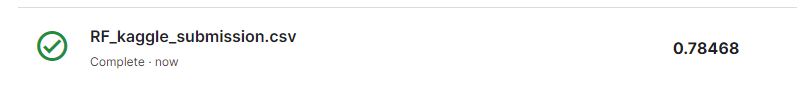

#### Principal component analysis (PCA)
PCA is a dimensionality reduction technique commonly used in machine learning and statistics. Its goal is to transform high-dimensional data into a lower-dimensional image while conserving as much of original variability as posibible. PCA achieves this by identifying the principal components, which are linear combinations of the original features that capture the maximum variance in the data.

PCA was preform using sklearn package. In order to increase values of principal components, additional features were removed: "PassengerId", "SibSp", "Parch" and "Fare". Data was then standarized.

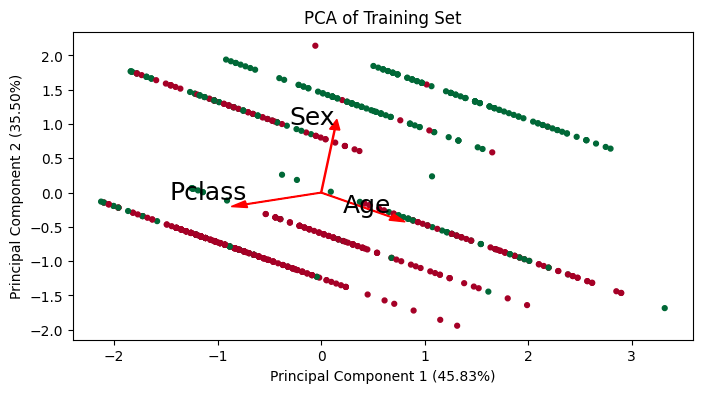

In [53]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# dropping unnecessary columns before PCA
columns_to_drop = ["PassengerId","SibSp", "Parch",'Fare']
df_train_pca = df_train_processed.drop(columns=columns_to_drop)
X_train = df_train_pca.drop(columns=['Survived'])
y_train = df_train_pca['Survived']


# standardizing features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
#preforming pca
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_standardized)
components = pca.components_

# ploting
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 4))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='RdYlGn',s=12)
plt.title('PCA of Training Set')
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.2f}%)')

# labeling and adding arrows for original features
feature_names = X_train.columns
for i, (pc1, pc2) in enumerate(zip(components[0], components[1])):
    plt.text(pc1, pc2, feature_names[i], fontsize=18, ha='right', va='bottom')
    plt.arrow(0, 0, pc1, pc2, color='r', width=0.01, head_width=0.1)

plt.show()

First two components cover around 81% of data's variance, which is good result. One can conclude, that most of the women survived, while most of the man died in disaster. Unfortunately young age wasn't decisive factor for survival - some children did not survive (mostly form 3rd class). In terms of class membership, females from 3rd class had lower survivalability and some 1st class males managrd to survive.

#### Summary
We started with the data exploration where we got a feeling for the dataset, checked about missing data and learned which features are important. During the data preprocessing part, we computed missing values, converted features into numeric ones. Afterwards we started training 3 different machine learning models (per each team member). Then we discussed our results. Also used PCA for the egeneral overview of Titanic disaster.

Did we reach our goals? - YES

*   Assessment of survival factors, find useful features - Sex, Age, Class
*   No experiments, just the implementation of ML algorithms, their combinations, pipelines - partialy, no combinations, 3 separate models.
*   Compare results with Kaggle competitors, python libraries - Done, scores comperared. The best results were obtained using Random Forest model.
